In [11]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch
from typing import Dict
import os
from stable_baselines3.common.save_util import load_from_zip_file

# Net2WiderNet Depth 2 Random

In [12]:
base_path = "fehring_growing_nn_new_seeded/ant_net2deeper/22/(32, 0.2, None, 9.853902629348276e-05, 0.95, 0.00014592877169397115, 0.5, 5, 2048, True, 0.001, 0.99)/8/0/model.zip"
data, params, pytorch_variables = load_from_zip_file(base_path) 
# loda 

In [13]:
params["policy"].keys()

odict_keys(['log_std', 'features_extractor.input_layer.weight', 'features_extractor.input_layer.bias', 'features_extractor.net2deeper_network.sequential_container.0.weight', 'features_extractor.net2deeper_network.sequential_container.0.bias', 'features_extractor.net2deeper_network.sequential_container.2.weight', 'features_extractor.net2deeper_network.sequential_container.2.bias', 'features_extractor.net2deeper_network.sequential_container.4.weight', 'features_extractor.net2deeper_network.sequential_container.4.bias', 'features_extractor.net2deeper_network.sequential_container.6.weight', 'features_extractor.net2deeper_network.sequential_container.6.bias', 'features_extractor.net2deeper_network.sequential_container.8.weight', 'features_extractor.net2deeper_network.sequential_container.8.bias', 'features_extractor.net2deeper_network.sequential_container.10.weight', 'features_extractor.net2deeper_network.sequential_container.10.bias', 'features_extractor.net2deeper_network.sequential_conta

In [14]:
# First layer weights
first_layer_weights = params["policy"]["features_extractor.net2deeper_network.sequential_container.0.weight"]
first_layer_weights = np.abs(first_layer_weights)
# Second layer weights
second_layer_weights = params["policy"]["features_extractor.net2deeper_network.sequential_container.2.weight"]
second_layer_weights = np.abs(second_layer_weights)
# Last layer weights
last_layer_weights = params["policy"]["features_extractor.net2deeper_network.sequential_container.14.weight"]
last_layer_weights = np.abs(last_layer_weights)

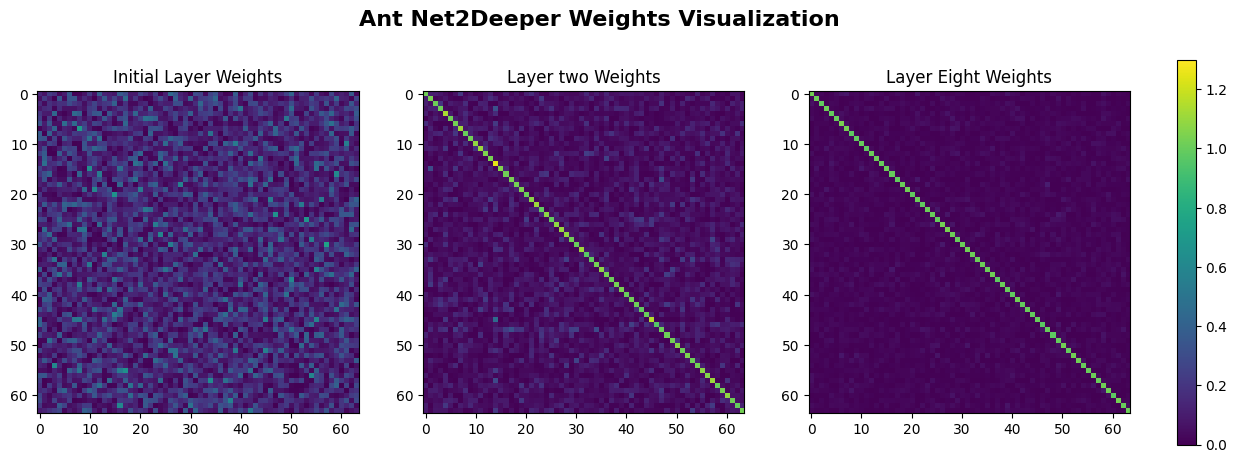

In [15]:
# Subplot with 3 figures horically
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# First layer weights
axs[0].imshow(first_layer_weights, cmap='viridis', vmin=0, vmax=1.3)
axs[0].set_title('Initial Layer Weights')
# Second layer weights
axs[1].imshow(second_layer_weights, cmap='viridis', vmin=0, vmax=1.3)
axs[1].set_title('Layer two Weights')
# Last layer weights
im3 = axs[2].imshow(last_layer_weights, cmap='viridis', vmin=0, vmax=1.3)
axs[2].set_title('Layer Eight Weights')
# Add colorbar for axs[2]
fig.colorbar(im3, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
plt.suptitle('Ant Net2Deeper Weights Visualization', fontsize=16, fontweight='bold')
plt.savefig('plotting/network_weights/ant/weights.png', bbox_inches='tight')